### Implement a simple deep neural network for solving the polynomial  
**y = 3x^3 + 7x^2 - 12x + 2 with the following specifications:**

- **Use three hidden-layers of sizes 32, 64, and 128 and display the generated DNN with the required number of parameters.**
- **Generate training samples within the range of -20 to +20. Use the appropriate method for normalizing the training data in the range of -1 to +1.**
- **Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with and appropriate number of epochs.**
- **Display the training accuracy vs validation accuracy and training error vs validation error curves.**
- **After training, use the test data for prediction and display the prediction accuracy vs true levels of the test data.**

In [1]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model 

In [18]:
x = np.random.uniform(-20, 20, 10000)

In [22]:
x[:10]

array([11.76251085,  7.14892719,  8.60442855, 10.62604268, -9.00148834,
        2.70080952, -3.84387932, 10.18522167,  8.51651038, 10.0368105 ])

In [19]:
y = 3*(x*x*x) + 7*(x*x) - 12*x + 2 

In [23]:
y[:10]

array([ 5711.61169695,  1370.0470882 ,  2328.11753018,  4264.32511842,
       -1510.87977142,    79.75301838,   -18.83024865,  3775.75472264,
        2260.65025681,  3619.97277657])

In [40]:
x_data = (2 * (x - np.min(x)) / (np.max(x) - np.min(x))) - 1
y_data = (2 * (y - np.min(y)) / (np.max(y) - np.min(y))) - 1

In [42]:
x_data[:10]

array([ 0.58817371,  0.35748276,  0.43026154,  0.5313474 , -0.45007924,
        0.13506552, -0.19218562,  0.50930523,  0.4258654 ,  0.50188429])

In [27]:
x.shape

(10000,)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

In [43]:
# Reshape the data
x_reshaped = x.reshape(-1, 1)
y_reshaped = y.reshape(-1, 1)


In [45]:
x_reshaped.shape

(10000, 1)

In [47]:
# Fit and transform the data
x_scaled = scaler.fit_transform(x_reshaped).flatten()
y_scaled = scaler.fit_transform(y_reshaped).flatten()


In [49]:
x_scaled.shape

(10000,)

In [50]:
x_scaled[:10]

array([ 0.58817371,  0.35748276,  0.43026154,  0.5313474 , -0.45007924,
        0.13506552, -0.19218562,  0.50930523,  0.4258654 ,  0.50188429])

# train, validation, test split

In [51]:
size = len(x_data)
x_train = x_data[: int(size * 0.9)] 
y_train = y_data[: int(size * 0.9)]
x_validation=x_data[int(size * 0.9) : int(size * 0.95)] 
y_validation =y_data[int(size * 0.9) : int(size * 0.95)]
x_test=x_data[int(size * 0.95) :]
y_test= y_data[int(size * 0.95):]

In [3]:
from tensorflow.keras.models import Sequential


In [85]:
modelwithSequential = Sequential([
    Input(shape=(1,)),
    Dense(units=32, activation='sigmoid'),
    Dense(units=64, activation='sigmoid'),
    Dense(units=128, activation='sigmoid'),
    Dense(units=1)
])

modelwithSequential.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
modelwithSequential.summary()




Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_53 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
modelwithSequential.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_53 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,877 (124.52 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,252 (83.02 KB)

In [97]:
modelwithSequential_h = modelwithSequential.fit(x_train, y_train, epochs = 20,  validation_data = (x_validation, y_validation), verbose = 1)


Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 4.0102e-04 - loss: 0.0017 - val_accuracy: 0.0000e+00 - val_loss: 0.0016
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 2.2379e-05 - loss: 0.0014 - val_accuracy: 0.0000e+00 - val_loss: 0.0021
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 6.2826e-05 - loss: 0.0012 - val_accuracy: 0.0000e+00 - val_loss: 7.8184e-04
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 4.9858e-05 - loss: 8.2804e-04 - val_accuracy: 0.0000e+00 - val_loss: 8.2765e-04
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 5.4864e-05 - loss: 6.5250e-04 - val_accuracy: 0.0000e+00 - val_loss: 6.8981e-04
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 9.1762e-05 - loss: 5.1716e-04 - val_accuracy: 0.0000e+00 - val_loss: 6.0470e-04
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 9.2660e-05 - loss: 4.0087e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.2993e-04
Epoch 8/20
2

In [98]:
modelwithSequential_h

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


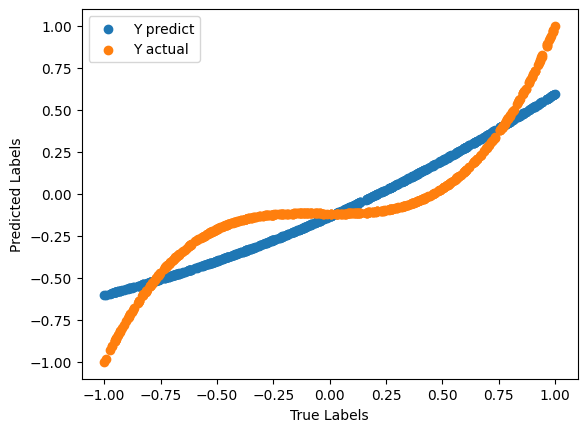

In [93]:
y_pred = modelwithSequential_h.predict(x_test)
plt.scatter(x_test, y_pred, label='Y predict')
plt.scatter(x_test, y_test,label='Y actual')

plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.legend()
plt.show()


In [87]:
test_loss, test_accuracy = modelwithSequential.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.5f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0219 
Test Loss: 0.0223677
Test Accuracy: 0.00000%


In [71]:
print(modelwithSequential_h.history)


{'accuracy': [0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703, 0.00011111111234640703], 'loss': [0.024976203218102455, 0.02468520775437355, 0.024628562852740288, 0.024672003462910652, 0.024970637634396553, 0.024559400975704193, 0.02448004111647606, 0.024762040004134178, 0.024050870910286903, 0.023808466270565987, 0.02381347306072712, 0.02391701750457287, 0.023278575390577316, 0.02314271591603756, 0.02299530617892742, 0.022642049938440323, 0.02244810201227665, 0.022146902978420258, 0.02163376286625862, 0.02117694541811943], 'val_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

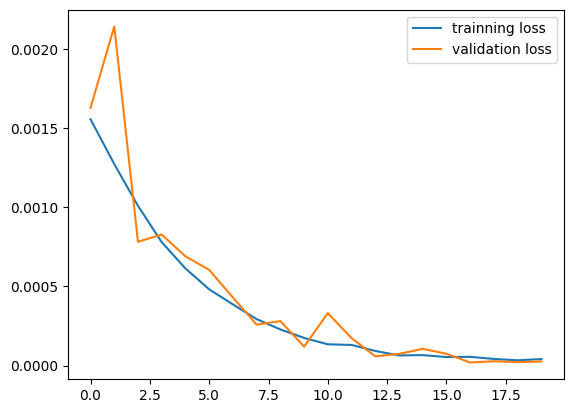

In [99]:
plt.plot(modelwithSequential_h.history['loss'],label='trainning loss')
plt.plot(modelwithSequential_h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

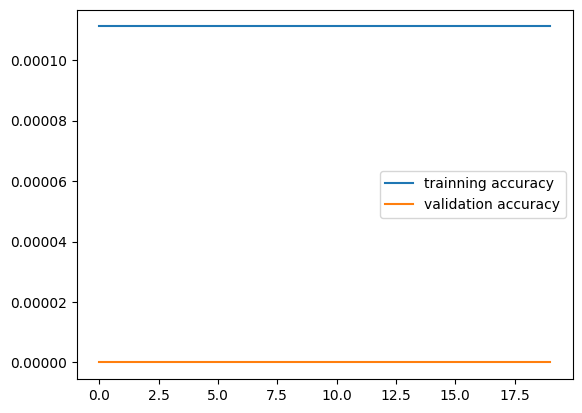

In [78]:
plt.plot(history_modelwithSequential.history['accuracy'],label='trainning accuracy')
plt.plot(history_modelwithSequential.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()

In [53]:
inputs = Input((1,))
x = Dense(32, activation = "relu")(inputs)
x = Dense(64, activation = "relu")(x)
x = Dense(128, activation = "relu")(x)
outputs = Dense(1, name = "Output_Layer")(x)

model_manual = Model(inputs, outputs, name = "Manual_DNN_Model")
model_manual.summary()
model_manual.compile(optimizer = "adam", loss = "mean_squared_error", metrics = [tf.keras.metrics.R2Score(name = "accuracy")])


Model: "Manual_DNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
trained_model_manual = model_manual.fit(x_train, y_train, epochs = 20,  validation_data = (x_validation, y_validation), verbose = 0)


In [75]:
print(trained_model_manual.history)

{'accuracy': [0.9998094439506531, 0.9999723434448242, 0.9999552369117737, 0.9999732375144958, 0.9994406700134277, 0.9999516606330872, 0.9999905824661255, 0.9999884366989136, 0.999907910823822, 0.9995934367179871, 0.9999784231185913, 0.999964714050293, 0.999927282333374, 0.9998939037322998, 0.99998939037323, 0.9999670386314392, 0.9996477961540222, 0.9998456239700317, 0.9999738931655884, 0.9999930262565613], 'loss': [2.7462043362902477e-05, 3.983982423960697e-06, 6.452316938521108e-06, 3.858021500491304e-06, 8.061694825300947e-05, 6.968380603211699e-06, 1.3570444252763991e-06, 1.6661707604725962e-06, 1.3277342986839358e-05, 5.859547309228219e-05, 3.1129516173677985e-06, 5.0820581236621365e-06, 1.0477239811734762e-05, 1.5291130694095045e-05, 1.532721967123507e-06, 4.747512775793439e-06, 5.0760550948325545e-05, 2.224834679509513e-05, 3.7647655517503154e-06, 1.0089032684845733e-06], 'val_accuracy': [0.9997271299362183, 0.9999895691871643, 0.9999602437019348, 0.9999286532402039, 0.9995959997

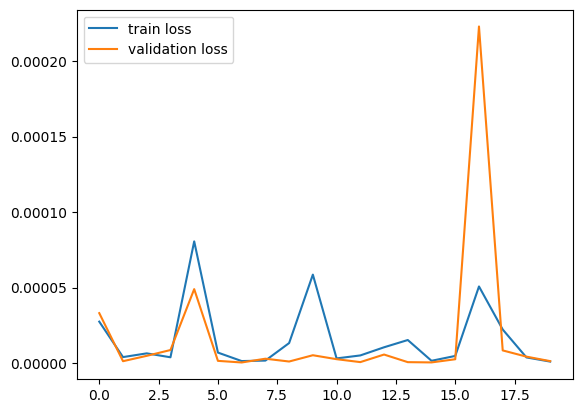

In [76]:
plt.plot(trained_model_manual.history['loss'],label='train loss')
plt.plot(trained_model_manual.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

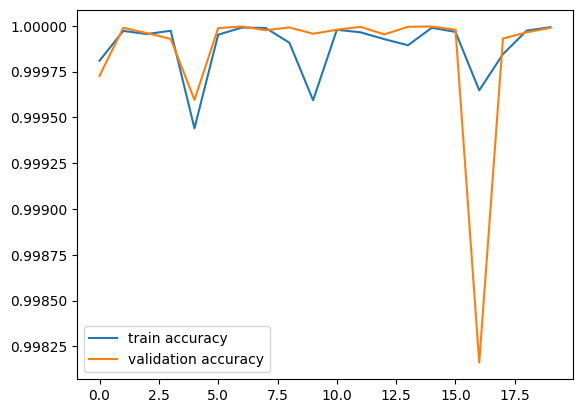

In [77]:
plt.plot(trained_model_manual.history['accuracy'],label='train accuracy')
plt.plot(trained_model_manual.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()

In [83]:
test_loss, test_accuracy = model_manual.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.5f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.3919e-06 
Test Loss: 0.0000014
Test Accuracy: 99.99892%


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


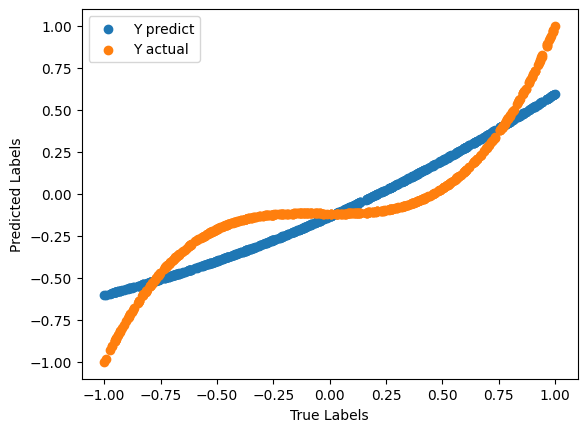

In [94]:
y_pred_m = modelwithSequential.predict(x_test)
plt.scatter(x_test, y_pred_m, label='Y predict')
plt.scatter(x_test, y_test,label='Y actual')

plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.legend()
plt.show()
